<a href="https://colab.research.google.com/github/TheNandinee/Swami-Chinmayananda-s-Gita-Translations-Sentiment-Semantic-Analysis/blob/main/Preprocesing%2BSentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPLOADING DATA FILE**

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import PyPDF2
import re
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Swami Chinmayana.pdf to Swami Chinmayana.pdf


**EXTRACTING TEXT FROM PDF**

In [ ]:
# Step 1: Extract text from the PDF
def extract_text_from_pdf(pdf_file):
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

# Checking the first 500 characters to verify text extraction
print(text[:500])

 
 
 
HOLY GEETA 
 
 
By 
Swami Chinmayananda 
 
  Holy Geeta by Swami Chinmayananda 
 
2 
 General introduction 
To 
Bhagawad Geeta 
IF THE Upanishads are the text-books of philosophical 
principles discussing man, world and God, the Geeta is a 
hand-book of instructions as to how every human being 
can come to live the subtle philosophical principles of 
Vedanta in the actual work-a-day world. 
Srimad Bhagawad Geeta, the Divine Song of the Lord, 
occurs in the Bhishma Parv a of the Mahabharata


 **TEXT CLEANING AND STRUCTURING**

In [ ]:
# Splitting text into chapters and verses using

def extract_verses(text):
    chapters = re.split(r'Chapter\s+\d+', text)  # Split by chapter headings
    verses = []
    for chapter in chapters:
        chapter_verses = re.findall(r'\d+\.\s+([^0-9]+)', chapter)  # Match verse number followed by text
        # Clean each verse by removing newline characters and unnecessary spaces
        chapter_verses = [verse.replace("\n", " ").strip() for verse in chapter_verses]
        verses.extend(chapter_verses)
    return verses

# Extract verses
verses = extract_verses(text)

# Check the first 5 verses
print(verses[:5])

["What did th e sons of Pandu and also my  people do when, desirous to fight, they assembled together on the  holy plain of Kurukshetra, O Sanjaya?   In the entire Geeta this is the only verse which the blind  old king Dhritarashtra gives out. All the rest of the seven  hundred stanzas are Sanjaya's report on what happened  on the Kurukshetra battle-field, just before the war.   The blind old king is certainly conscious of the palpable  injustices that he had done to his nephews, the Pandavas.  Dhritarashtra knew the relati ve strength of the two  armies, and therefore, was fully confident of the larger  strength of his son's army. An d yet, the viciousness of his  past and the consciousness of the crimes perpetrated seem  to be weighing heavily upon the heart of the blind king,  and so he has his own doubts on the outcome of this war. Holy Geeta by Swami Chinmayananda", 'Having seen the army of the Pandavas drawn  up in battle array, King Duryodhana then approached his teacher (Drona)

**ANNOTATION OF SENTIMENT LABELS AUTOMATICALLY**

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Perform sentiment analysis on each verse
labeled_df = pd.DataFrame({
    "verse": verses,
    "sentiment": [sentiment_analyzer(v)[0]["label"].lower() for v in verses]
})

# Check labeled data
print(labeled_df.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                               verse sentiment
0  What did th e sons of Pandu and also my  peopl...  positive
1  Having seen the army of the Pandavas drawn  up...  negative
2  Behold, O Teacher! this mighty army of the son...  negative
3  Here are heroes, mighty archers, equal in batt...  positive
4  Dhrishtaketu, Chekitana, and the valiant king ...  positive


**PRE-PRCESSING FOR SENTIMENT ANALYSIS + TOKENIZING**


In [ ]:
# Text cleaning and preprocessing
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove extra spaces
    return text

# Apply cleaning
labeled_df["cleaned_verse"] = labeled_df["verse"].apply(clean_text)

In [ ]:
# Tokenization and padding (for deep learning models)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df["cleaned_verse"])
sequences = tokenizer.texts_to_sequences(labeled_df["cleaned_verse"])

# Padding sequences to uniform length
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

print("First padded sequence:", padded_sequences[0])

First padded sequence: [  75 1235   71   58  609    2 1609    3   62   79  334  106   33 2266
    5  392   48 2267  520   45    1   19 4247    2 1886   32  364    4
    1  185   12   13    6    1   53  254   26    1  787  638  365  682
  321   85   11    1  917    2    1 1236 1237  226   16 1407 2268   45
   75 2986   45    1 1886  639  421  374    1  322    1  787  638  365
    6  788  491    2    1 2987 4248    9   20  131  345    5   14 4249
    1 1117  682 1887    1 4250  918  492    2    1  116  919    3  105
   88  346 2988    2    1 1888  492    2   14  609  465   27  119  181
    1 4251    2   14  446    3    1  255    2    1 2269 4252 1889    5
   22 2989 2990   87    1  261    2    1  787  365    3   68   20   30
   14   60 1118   45    1 4253    2   13  322   19   12    8   17   18
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    

**LABEL ENCODING**


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
labeled_df['sentiment_encoded'] = le.fit_transform(labeled_df['sentiment'])

# One-hot encoding
onehot_labels = to_categorical(labeled_df['sentiment_encoded'])

**80-20 SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

# Convert sentiment labels to numeric format
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
labeled_df["sentiment_numeric"] = labeled_df["sentiment"].map(sentiment_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, onehot_labels, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 556, Testing samples: 139


**MODEL DEFINITION**

In [ ]:
num_classes = len(labeled_df['sentiment_encoded'].unique())
print(f"Number of unique classes: {num_classes}")


Number of unique classes: 2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Calculate vocab_size
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token (0)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(num_classes, activation='softmax')  # Ensure 'num_classes' matches the dataset
])


**MODEL COMPLIATION**

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
    optimizer='adam',
    metrics=['accuracy']
)

**TRAINING**

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.5152 - loss: 0.6949 - val_accuracy: 0.6187 - val_loss: 0.6693
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.5521 - loss: 0.6924 - val_accuracy: 0.6187 - val_loss: 0.6734
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.5626 - loss: 0.6862 - val_accuracy: 0.6187 - val_loss: 0.6722
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.5799 - loss: 0.6820 - val_accuracy: 0.6187 - val_loss: 0.6712
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.5522 - loss: 0.6888 - val_accuracy: 0.6187 - val_loss: 0.6714


**EVALUATION AND RESULTS**


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6173 - loss: 0.6718
Test Loss: 0.6714
Test Accuracy: 0.6187


**MAKING PREDICTIONS**

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions and actual labels from one-hot encoding to class indices
y_pred_classes = y_pred.argmax(axis=1)  # Predicted class indices
y_true_classes = y_test.argmax(axis=1)  # True class indices

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


**CONFUSION MATRIX**

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.62      1.00      0.76        86

    accuracy                           0.62       139
   macro avg       0.31      0.50      0.38       139
weighted avg       0.38      0.62      0.47       139



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


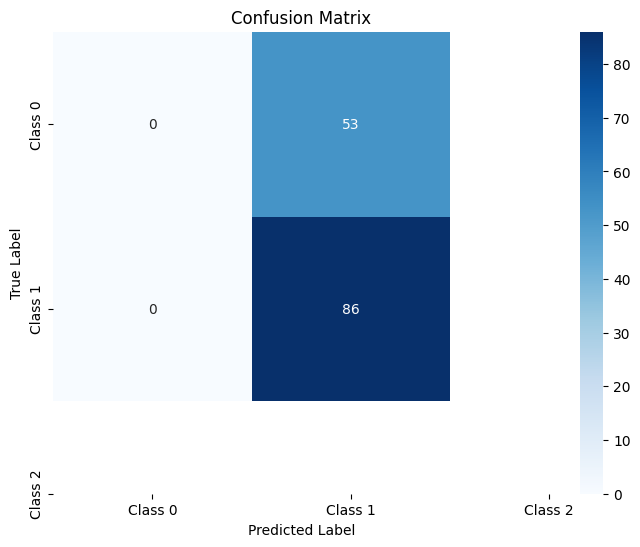

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**VISUALISATIONS**

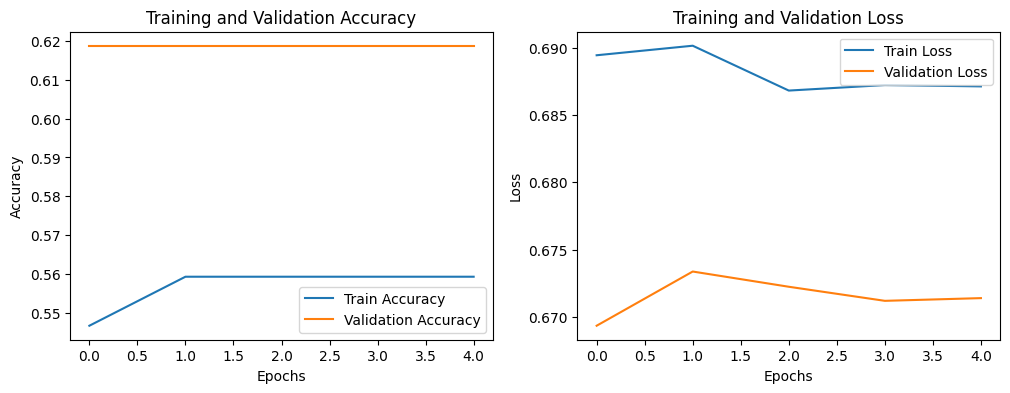

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()